# **Introducción**

**Contexto de Negocio**

¿Cuáles son las razones por las que las personas pueden cancelar las reservas de hotel?
Los nuevos canales de reserva online en hoteles han cambiado drásticamente la gestion de reserva y el comportamiento de los clientes. Un gran numero de reservas de hotel son modificadas diariamente debido a cancelaciones o abstenciones. Las razones típicas de cancelaciones son por cambio de planes, conflictos de programación, entre otras. Esto a menudo se hace más fácil por la opción de hacerlo de forma gratuita o, preferiblemente, a un bajo costo, lo que es beneficioso para los huéspedes del hotel, pero es un factor menos beneficioso y que posiblemente aumente los costos para los hoteles. 

El costo de la cancelación de las reservas recae en el hotel, donde debe disponer de tiempo y recursos para resolver el problema. ¿Cómo podemos averiguar qué reservas tienen una mayor probabilidad de ser canceladas para que podamos tomar medidas preventivas para evitar que se desperdicie tiempo y recursos adicionales?


**Problema de Negocio**

Debemos responder, ¿Qué características son más importantes para determinar si un cliente cancelara una reserva?

**Contexto analítico**

Tenemos disponible los siguientes datos que han sido recopilados por la empresa:
1.	El archivo “Hotel Reservations.csv” contiene el historial de las reservas realizadas en el Hotel
Como primer paso, (1) se analizaran los datos existentes, detectando posibles deficiencias, (2) se extraerán los datos y se realizara limpieza de datos, EDA, entre otros y por ultimo (3) se creara un modelo predictivo en base a la identificación de patrones.


**Procedimiento de análisis**

El trabajo se enfocara en un modelo de predicciones para luego interpretar los datos obtenidos, con la finalidad de detectar la probabilidad de cancelacion de las reservas.
En una primera etapa, verificaremos la/las variables que mejor explican si un cliente tiene tendencia a cancelar la reseva, como puede cantidad de personas, hijos, pedidos especiales, forma de reserva, entre otras.
Una vez definidas las variables claves armaremos los modelos y seleccionaremos el que mejor se ajuste a la realidad del negocio

Mediante el modelo obtenido, el hotel podrá predecir la probabilidad de cancelacion de reservas de los **clientes**, con el fin de personalizar las campañas publicitarias y realizar mejor en los productos, servicios y atención brindada.

# **StoryTelling Reservas para vacaciones de Invierno**

Dentro de los próximos meses, iniciaran las vacaciones de inviernos y todos los Hoteles de Mendoza se encuentran con una ocupación del 100% en sus reservas. Ante esta particularidad post pandemia, donde las personas quieren vacacionar fuera de las ciudades, un Hotel muy reconocido de Bariloche esta preparando un modelo predictivo que le permite predecir cuándo un huésped cancelara su reserva, permitiendo reducir los costos por cancelaciones y dándole la oportunidad a otras personas para que disfruten de sus vacaciones nevadas.

El modelo en cuestión, tomara datos de 36.275 reservas de hoteles durante el año 2017-2018 y 18 variables para predecir si se cancelaran las reservas de las habitaciones del hotel.



1.   Como primera impresión, observamos que mas del 80% de las reservas que se realizaron entre 2017-2018 fueron para 2 personas adultas, dando a entender que se trata de parejas jóvenes sin hijos. 

2.  Continuando con las reservas, en segundo lugar encontramos reservas para una sola persona, lo cual podríamos pensar que están por trabajo. 

En base a esto, podríamos preguntarnos sobre el tipo de habitación que debería ofrecer el Hotel para maximizar ganancias. 

2.   Otro dato relevante sobre la infraestructura del Hotel, es que no es habitual que se solicite parking al momento de la reserva.

Esto podría deberse a que los huéspedes suelen ir en avión hasta Mendoza o que los vehículos pueden quedar en la calle sin necesidad de un parking cerrado.

3.  Observamos que los meses mas concurridos suelen ser Agosto-Diciembre y que no existe una marcada diferencia de precios durante los meses del año.

4. Otra particularidad que observamos que es mas de la mitad de las reservas tienen un pedido especial como pueden ser vista a la cordillera, llevar mascotas, entre otras.











# **Importacion de datos y visualizaciones**


In [113]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import f1_score

from pandas_profiling import ProfileReport



url = "https://raw.githubusercontent.com/AndresPittini/Proyect-Coder/main/Hotel%20Reservations.csv"
df = pd.read_csv(url)
df= df.drop("Booking_ID", axis=1)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
pip install pandas-profiling

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.isnull().values.any()

El dataset no contiene datos nulos

In [110]:
df['booking_status'] = df['booking_status'].replace({"Not_Canceled":0, "Canceled":1})

Convertimos a codigo binario

1= No cancelado
0= Cancelado

In [ ]:
profile = ProfileReport(df, title="Hotel Reservation Classification")
profile

Mediante el uso del Panda Profiling podemos hacer un análisis exploratorio de los datos de forma rápida e identificar las principales alertas.
Observamos que no tenemos datos nulos y los datos duplicados ascienden al 8.7% 
Del total de columna, tenemos 10 con datos numéricos y 8 con información categórica.

En cuanto a las alertas, nos indica que tenemos 3138 datos duplicados y que existe un alta correlación entre cantidad de reservas no canceladas y si es un huésped habitual.


In [125]:
df['repeated_guest'] = df['repeated_guest'].replace({0:"No", 1:"Si"})
df['required_car_parking_space'] = df['required_car_parking_space'].replace({0:"No", 1:"Si"})

In [126]:
Parametros = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space','room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
              'market_segment_type', 'repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

Objetivo = 'booking_status'

In [127]:
num_df=df[["no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights","lead_time","arrival_year","arrival_month","arrival_date",
           "no_of_previous_cancellations","no_of_previous_bookings_not_canceled","avg_price_per_room","no_of_special_requests"]] 

In [ ]:
num_df['avg_price_per_room'] = num_df['avg_price_per_room'].astype(int)

In [129]:
cat_df=df[['type_of_meal_plan','room_type_reserved','market_segment_type',"required_car_parking_space","repeated_guest","booking_status"]]

**Separamos los datos en dos categorias, numericos y categoricos.**

In [ ]:
num_df.info()

In [ ]:
num_df.head()

In [ ]:
cat_df.head()

In [ ]:
df.booking_status.value_counts()

In [ ]:
num_df.describe().T

# **Exploratory Data Analysis (EDA)**


In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (8, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt='.1f')
fig.show()

In [ ]:
abs(corr_matrix['booking_status']).sort_values(ascending=False)

Eliminamos el dia y mes de llegada, dado que tienen poca correlacion con el estado de la reserva

In [23]:
del(num_df['arrival_date'])

In [24]:
del(num_df['arrival_month'])

In [ ]:
num_df.head()

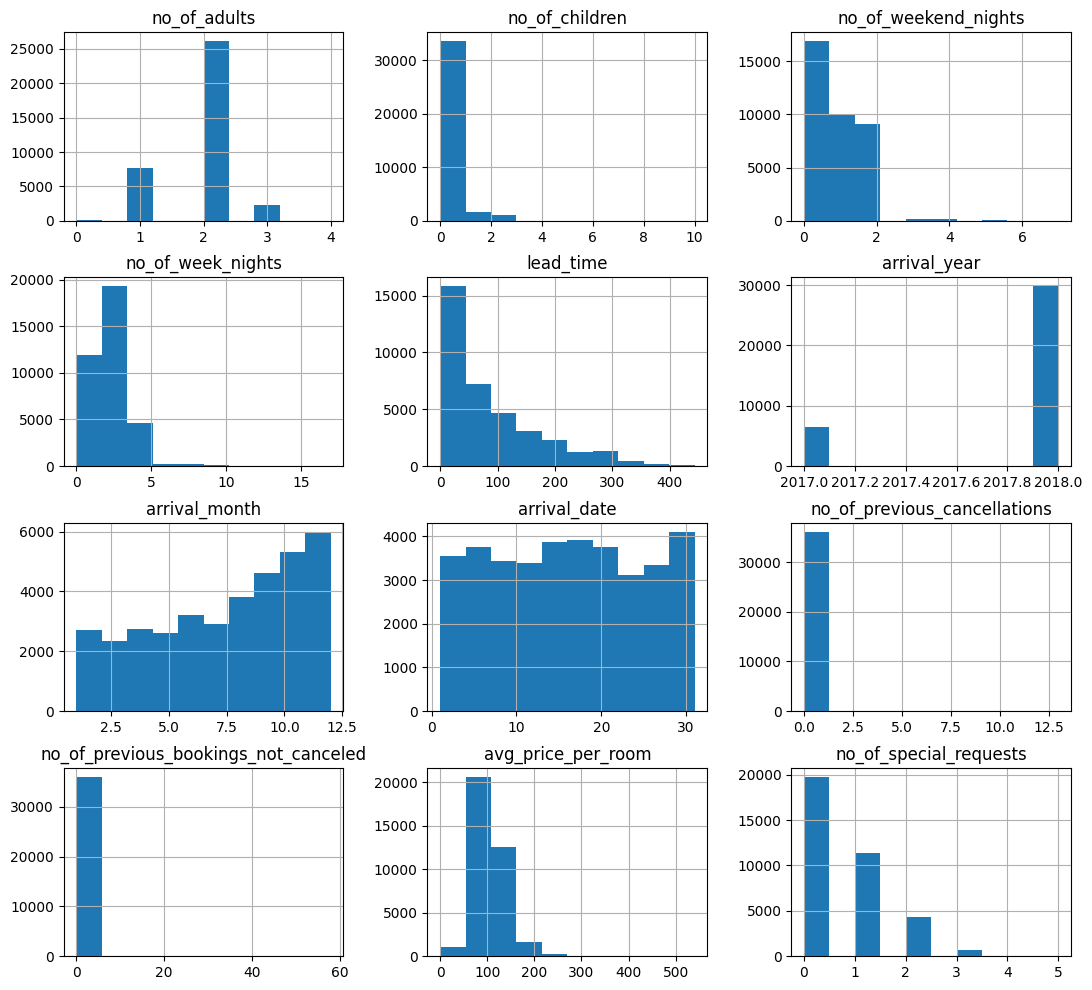

In [132]:
num_df.hist(bins=10, figsize=(13, 12))
plt.show()

Observaciones:

1-En su mayoria, las reservas realizadas son para 2 huespedes.

2-Cerca del 90% de las reservas, no incluyen hijos.

3-La mitad de las reservas, incluyen al menos 1 dia de fin de semana

4-Parking para vehiculo no es algo muy solicitado

5-El 50% de las reservas se realizan dentro de los 60 dias previos al check in

6-Disponemos de pocos datos del 2017, puede suceder que se comenzo a mitad de año o posterior.

7-Los meses de Agosto-Diciembre son los mas concurridos

8-No existe una tendencia marcada en el dia del mes

9-Los clientes no suelen repetir alojamiento en el mismo Hotel

10-Los clientes no suelen cancelar el alojamiento una vez que reservaron.

11-El precio promedio por noche ronda los 100 dolares

12-Cerca de la mitad de las reservas, tiene al menos un pedido especial.

**13-Una tercera parte de las reservas, son canceladas**


In [133]:
cat_df.hist(bins=10, figsize=(13, 12))
plt.show()

ValueError: ignored

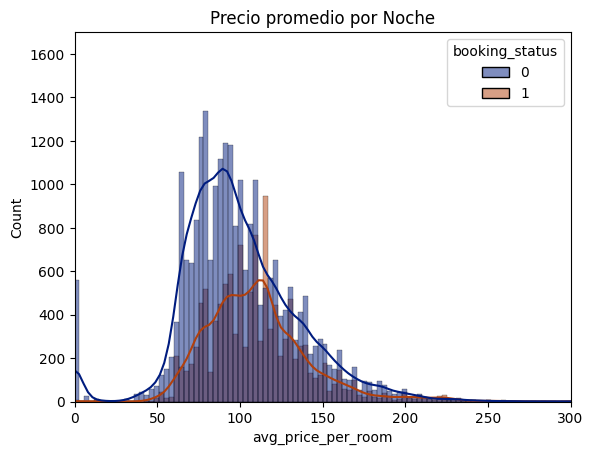

In [27]:
sns.histplot(x="avg_price_per_room", hue="booking_status", data=df, kde=True, palette="dark",bins=180)
plt.ylim(0,1700)
plt.xlim(0,300)
plt.title("Precio promedio por Noche");

In [28]:
pd.pivot_table(df, index = 'booking_status', values = ['avg_price_per_room'])

,avg_price_per_room
booking_status,
0,99.931412
1,110.589966


Estamos buscando si existe alguna correlación para el Hotel de Mendoza entre el precio por noche de las reservas y la posibilidad de que la misma sea cancelada, tal como surgen los datos no existe una diferencia sustancial entre el precio de las reservas concretadas y las reservas canceladas.

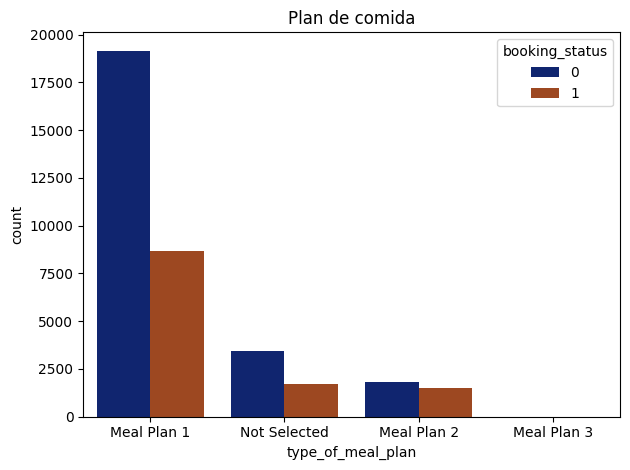

In [29]:
sns.countplot(x='type_of_meal_plan', hue="booking_status", data=df, palette="dark")
plt.title("Plan de comida")
plt.tight_layout()


Los planes de comida son un atractivo muy importante en los Hoteles, principalmente para los extranjeros que les gusta probar la comida autóctona de la zona, dentro del menú disponible del Hotel tenemos 3 planes de comida el cual es posible seleccionar al momento de la reserva, con el fin de tener todo listo para el día del alojamiento.
El menú que sobresale por su gran variedad de alimentos es el plan Nro 1, el cual es seleccionado mas del 80% de las veces.


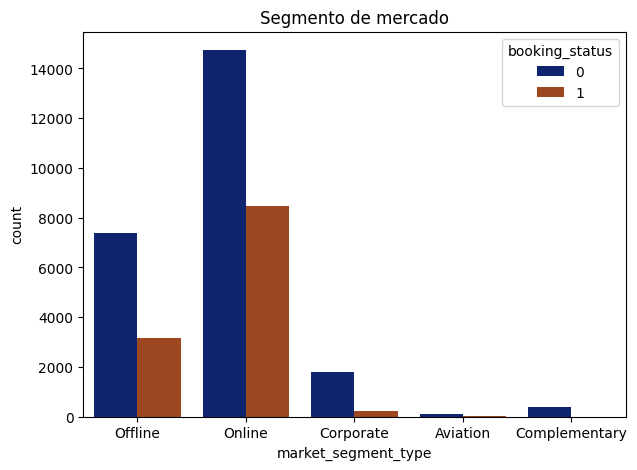

In [30]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='market_segment_type', hue="booking_status", data=df, palette="dark")
plt.title("Segmento de mercado")
plt.show()

Ante las nuevas tecnologías que disponemos dentro del Hotel, una de ella es la de gestionar a la reserva de forma online vía red social, WhatsApp o página web permitiendo al propio huésped realizar su reserva desde la comodidad de su hogar y disponer en vivo de la disponibilidad para asegurarle unas vacaciones placenteras.
Gracias a la inversión en sistemas de gestión de reservas, la cual funciona excelentemente, observamos que mas del 70% de las reservas se realizaron vía online, permitiendo una mejor logística para el Hotel y facilidad para el huésped.


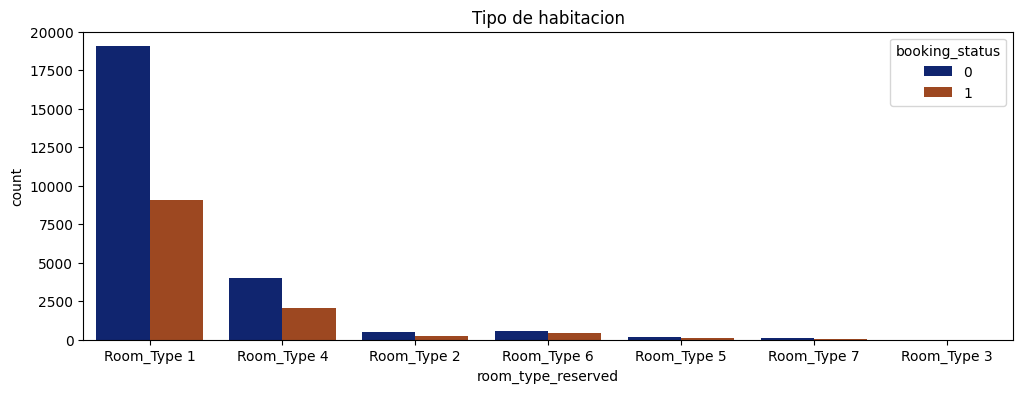

In [31]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(x='room_type_reserved', hue="booking_status", data=df, palette="dark")
plt.title("Tipo de habitacion")
plt.show()

El servicio por excelente de los Hoteles es brindar un hospedaje ameno a sus huéspedes y esto incluye una habitación acorde a las vacaciones que se merecen nuestros huéspedes. Para cumplir con los estándares esperados por los clientes, el Hotel ofrece 7 distintas habitaciones con diferencias capacidades y comodidades.
Asociado a la cantidad de adultos que suelen reservar alojamiento en el Hotel (2), notamos que la habitación Nro 1 y 4 son las mas frecuentadas.




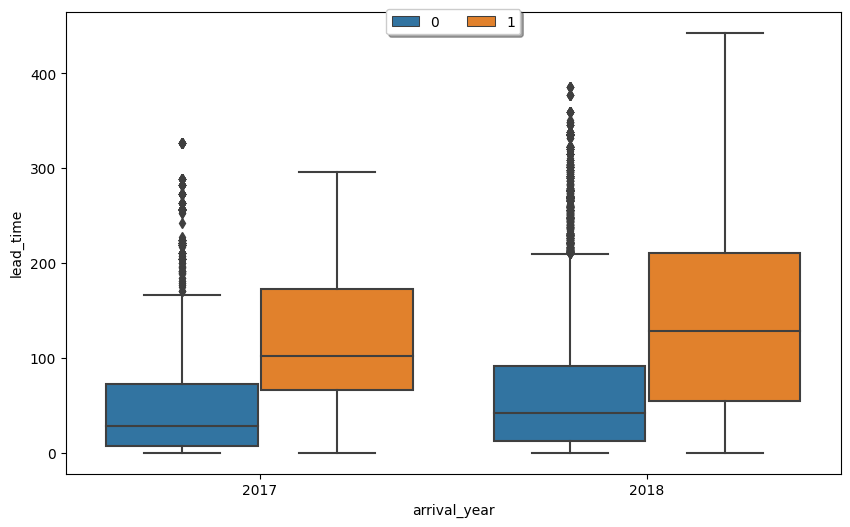

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="arrival_year", y= "lead_time", hue="booking_status")
plt.legend(loc = "upper center", bbox_to_anchor=(0.5,1.02),ncol=3, fancybox=True, shadow=True)

La cantidad de días entre que se reserva y la fecha de check in es muy importante para identificar las reservas que podrán ser canceladas (alta correlación), esto se puede dar por una mayor incertidumbre por parte del huésped y cambios de planes que puedan surgir.
Esto mismo se observó en el análisis realizado, las reservas mayores a 60 días tienen mayor tendencia a ser canceladas, tanto para el año 2017 como 2018.


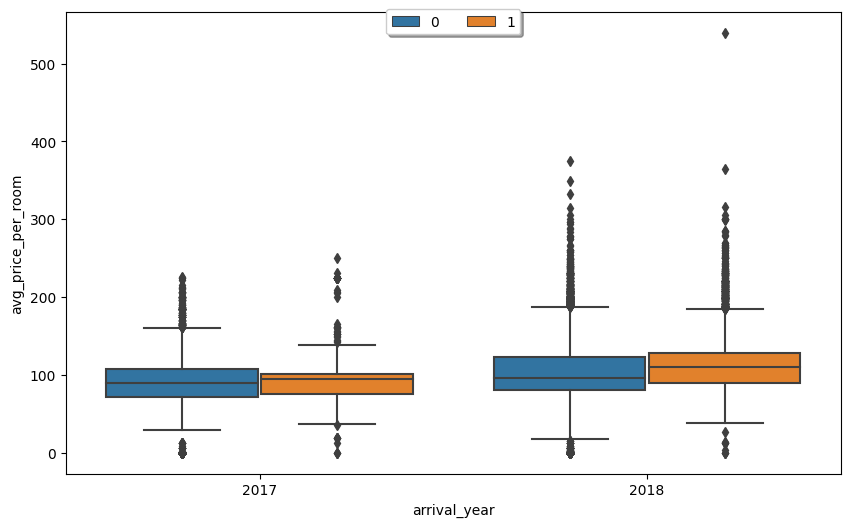

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="arrival_year", y= "avg_price_per_room", hue="booking_status")
plt.legend(loc = "upper center", bbox_to_anchor=(0.5,1.02),ncol=3, fancybox=True, shadow=True)

No se observan diferencias de precios que indiquen una tendencia a cancelar la reserva

# **Modelos**

In [34]:
le = LabelEncoder()

for col in df.columns:
	if df[col].dtype == 'object':
		df[col] = le.fit_transform(df[col])

In [35]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], downcast='unsigned')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  uint8  
 1   no_of_children                        36275 non-null  uint8  
 2   no_of_weekend_nights                  36275 non-null  uint8  
 3   no_of_week_nights                     36275 non-null  uint8  
 4   type_of_meal_plan                     36275 non-null  uint8  
 5   required_car_parking_space            36275 non-null  uint8  
 6   room_type_reserved                    36275 non-null  uint8  
 7   lead_time                             36275 non-null  uint16 
 8   arrival_year                          36275 non-null  uint16 
 9   arrival_month                         36275 non-null  uint8  
 10  arrival_date                          36275 non-null  uint8  
 11  market_segment_

<Axes: ylabel='count'>

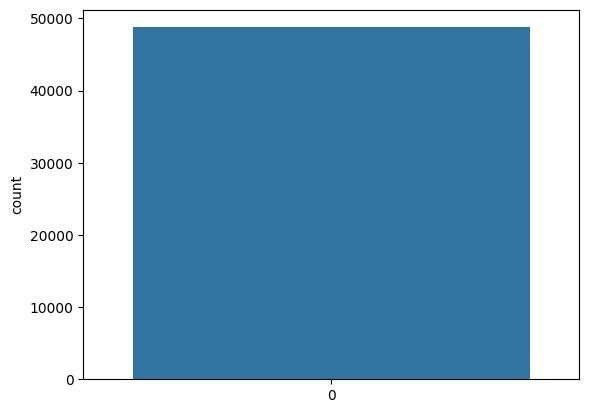

In [36]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(df[Parametros], df[Objetivo])
sns.countplot(y)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
def plot_cm(model, X, y, format='.3f'):
    """Plot confusion matrix"""    
    ConfusionMatrixDisplay.from_estimator(model, X, y,values_format=format,cmap='Blues',normalize='true')
    plt.show()

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
f1_score(y_test, y_pred)

0.8928790042848398

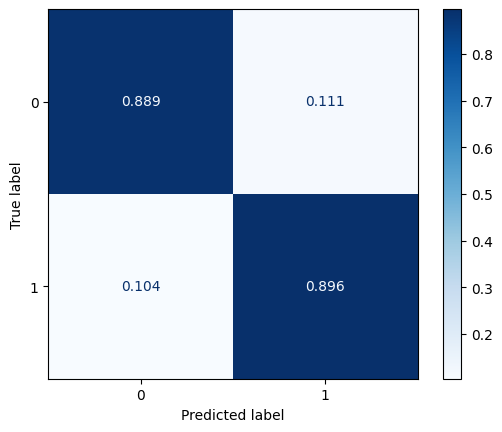

In [40]:
plot_cm(dt, X_test, y_test)

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
f1_score(y_test, y_pred)

0.9200706787236255

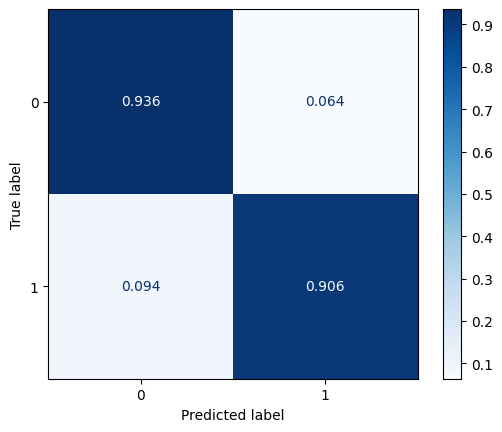

In [42]:
plot_cm(rf, X_test, y_test)

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
f1_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7883689976451316

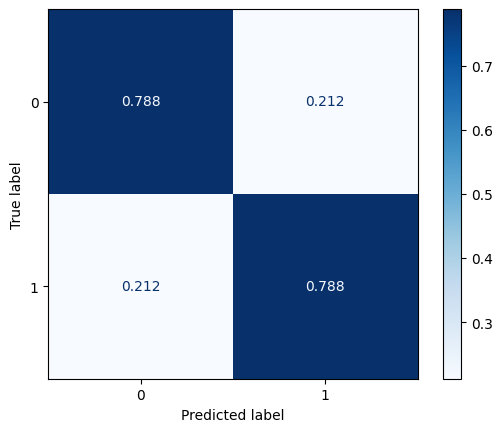

In [44]:
plot_cm(lr, X_test, y_test)

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
f1_score(y_test, y_pred)

0.8377128235409901

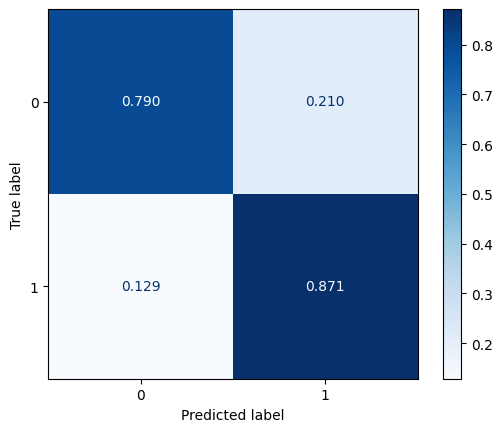

In [46]:
plot_cm(knn, X_test, y_test)

In [47]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
f1_score(y_test, y_pred)

0.6510511882998171

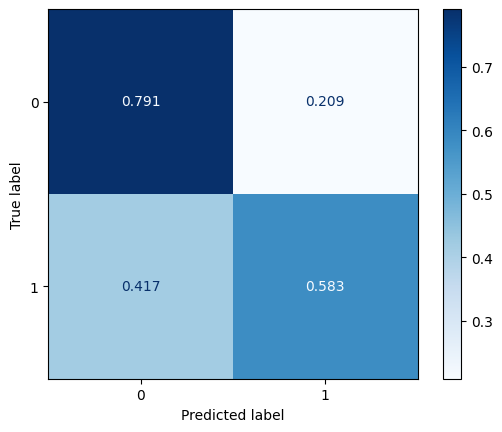

In [48]:
plot_cm(svm, X_test, y_test)

In [49]:
y_pred = rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4872
           1       0.93      0.91      0.92      4884

    accuracy                           0.92      9756
   macro avg       0.92      0.92      0.92      9756
weighted avg       0.92      0.92      0.92      9756



# **Conexion API**

In [50]:
## https://rapidapi.com/tipsters/api/booking-com/    get search hotel

import requests

url = "https://booking-com.p.rapidapi.com/v1/hotels/search"

querystring = {"checkin_date":"2023-09-27","dest_type":"city","units":"metric","checkout_date":"2023-09-28","adults_number":"2","order_by":"popularity","dest_id":"-553173","filter_by_currency":"AED","locale":"en-gb","room_number":"1","children_number":"2","children_ages":"5,0","categories_filter_ids":"class::2,class::4,free_cancellation::1","page_number":"0","include_adjacency":"true"}

headers = {
	"X-RapidAPI-Key": "b1a2465286msh38aec7a3ca1ae43p17e956jsne0dde0767383",
	"X-RapidAPI-Host": "booking-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'primary_count': 371, 'count': 371, 'room_distribution': [{'adults': '2', 'children': [5, 0]}], 'map_bounding_box': {'sw_long': 14.2691427469254, 'sw_lat': 49.9970216, 'ne_lat': 50.1492922727814, 'ne_long': 14.6035552024841}, 'total_count_with_filters': 371, 'unfiltered_count': 2268, 'extended_count': 0, 'unfiltered_primary_count': 2268, 'search_radius': 0.0, 'sort': [{'id': 'distance', 'name': 'Distance from city centre'}, {'id': 'popularity', 'name': 'Popularity'}, {'name': 'Stars (5 to 0)', 'id': 'class_descending'}, {'id': 'class_ascending', 'name': 'Stars (0 to 5)'}, {'id': 'bayesian_review_score', 'name': 'Guest review score'}, {'name': 'Price (low to high)', 'id': 'price'}], 'result': [{'distances': [{'icon_set': None, 'icon_name': 'bui_geo_pin', 'text': '\u200ePrague 1\u202c • \u200e1.3 km from centre\u202c'}, {'icon_set': None, 'icon_name': 'bui_baby_cot', 'text': '\u200eThis property has free cots available\u202c'}], 'cant_book': 0, 'distance': '1.33', 'selected_review_topic

In [51]:
import json
from pandas import json_normalize
json_string = json.dumps(response.json())
data = json.loads(json_string)

In [ ]:
data

In [ ]:
type(data)

In [ ]:
data['sort']#seleccionamos la parte de interes

In [ ]:
df2 = pd.DataFrame(data['sort'])
df2